In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
#from sklearn.model_selection import train_test_split

In [4]:
# set image size
IMAGE_SIZE = [224, 224]

In [5]:
train_dir = 'Dataset\train'
test_dir = 'Dataset\test'

In [6]:
# adding preprocessing layer to the front of VGG
Myvgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
# do not train current weights
for layer in Myvgg.layers:
  layer.trainable = False

In [8]:
dir = glob('Dataset/train/*')
dir

['Dataset/train\\cardboard',
 'Dataset/train\\e-waste',
 'Dataset/train\\glass',
 'Dataset/train\\medical',
 'Dataset/train\\metal',
 'Dataset/train\\paper',
 'Dataset/train\\plastic']

In [9]:
Myvgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
# our layers - you can add more if you want
#x = Flatten()(vgg.output)
#prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
# preparing model structure

x = Flatten(name='flatten')(Myvgg.output)
#x = Dense(4096, activation='relu', name='fc1')(x)
#x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(len(dir), activation='softmax', name='predictions')(x)

In [13]:
# create a model object
model = Model(inputs=Myvgg.input, outputs=x)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory("C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\VGG Version 1\\Dataset\\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\VGG Version 1\\Dataset\\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1781 images belonging to 7 classes.
Found 1793 images belonging to 7 classes.


In [19]:
# fit the model
r = model.fit_generator(training_set, validation_data=test_set, epochs=30, steps_per_epoch=len(training_set), validation_steps=len(test_set))

C:\Users\SUCHAL\AppData\Local\Temp/ipykernel_3480/3477428198.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(training_set, validation_data=test_set, epochs=30, steps_per_epoch=len(training_set), validation_steps=len(test_set))


Epoch 1/30


C:\Users\SUCHAL\AppData\Roaming\Python\Python39\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


56/56 [==============================] - 465s 8s/step - loss: 1.7030 - accuracy: 0.4509 - val_loss: 1.2111 - val_accuracy: 0.5678
Epoch 2/30
56/56 [==============================] - 438s 8s/step - loss: 0.8142 - accuracy: 0.7103 - val_loss: 1.1872 - val_accuracy: 0.5851
Epoch 3/30
56/56 [==============================] - 432s 8s/step - loss: 0.6593 - accuracy: 0.7765 - val_loss: 1.1993 - val_accuracy: 0.6074
Epoch 4/30
56/56 [==============================] - 427s 8s/step - loss: 0.4848 - accuracy: 0.8473 - val_loss: 1.1725 - val_accuracy: 0.6191
Epoch 5/30
56/56 [==============================] - 434s 8s/step - loss: 0.3981 - accuracy: 0.8815 - val_loss: 1.1183 - val_accuracy: 0.6525
Epoch 6/30
56/56 [==============================] - 430s 8s/step - loss: 0.3315 - accuracy: 0.9068 - val_loss: 1.1860 - val_accuracy: 0.6230
Epoch 7/30
56/56 [==============================] - 430s 8s/step - loss: 0.2813 - accuracy: 0.9169 - val_loss: 1.2062 - val_accuracy: 0.6352
Epoch 8/30
56/56 [======

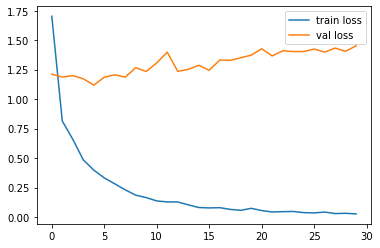

<Figure size 432x288 with 0 Axes>

In [20]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

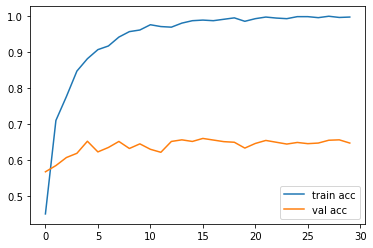

<Figure size 432x288 with 0 Axes>

In [21]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
#Save the trained model
from tensorflow.keras.models import load_model
model.save('my_vgg16.h5')

In [ ]:
### Prediction

In [18]:
y_pred = model.predict(test_set)

13/57 [=====>........................] - ETA: 2:37

C:\Users\SUCHAL\AppData\Roaming\Python\Python39\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


57/57 [==============================] - 221s 4s/step


In [19]:
y_pred

array([[0.08500873, 0.28780156, 0.09122134, ..., 0.0553831 , 0.03009822,
        0.29880983],
       [0.14573577, 0.33073416, 0.09233782, ..., 0.08821756, 0.02103272,
        0.16039072],
       [0.1662694 , 0.11895664, 0.23579189, ..., 0.04651655, 0.02365073,
        0.21571493],
       ...,
       [0.17370652, 0.2263721 , 0.19223757, ..., 0.04988628, 0.02767803,
        0.21742055],
       [0.11831947, 0.21726446, 0.21636562, ..., 0.07452464, 0.02583865,
        0.21819228],
       [0.11149145, 0.13298374, 0.18819457, ..., 0.05813894, 0.01889151,
        0.38676387]], dtype=float32)

In [20]:
#from keras.preprocessing.image import load_img
from keras_preprocessing.image import load_img
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from skimage.io import imread
from pylab import *


In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([6, 1, 2, ..., 1, 6, 6], dtype=int64)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
#Load the model
model=load_model('my_vgg16.h5')


In [25]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing import image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

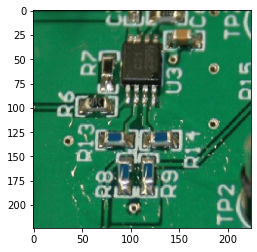

In [26]:
# Import the image for prediction
from tensorflow.keras.preprocessing import image
img=image.load_img("C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\VGG Version 1\\Dataset\\test\\e-waste\\e-waste 993.jpg",target_size=(224,224))
imshow(img)

In [27]:
x=image.img_to_array(img)
x

array([[[  1.,  70.,  39.],
        [  2.,  69.,  38.],
        [  1.,  68.,  37.],
        ...,
        [185., 200., 193.],
        [165., 187., 174.],
        [101., 139., 114.]],

       [[ 14.,  88.,  55.],
        [ 15.,  86.,  54.],
        [ 15.,  86.,  54.],
        ...,
        [179., 199., 190.],
        [130., 158., 143.],
        [ 72., 116.,  89.]],

       [[ 18., 100.,  62.],
        [ 18., 100.,  62.],
        [ 19.,  99.,  62.],
        ...,
        [154., 182., 168.],
        [ 95., 137., 115.],
        [ 57., 116.,  84.]],

       ...,

       [[ 15., 123.,  73.],
        [ 18., 126.,  76.],
        [ 19., 127.,  77.],
        ...,
        [153., 183., 183.],
        [107., 138., 141.],
        [ 73., 104., 107.]],

       [[ 15., 123.,  73.],
        [ 17., 125.,  75.],
        [ 19., 125.,  76.],
        ...,
        [172., 198., 189.],
        [160., 190., 180.],
        [140., 170., 160.]],

       [[ 17., 123.,  74.],
        [ 18., 124.,  75.],
        [ 17., 1

In [28]:
x.shape


(224, 224, 3)

In [ ]:
x=x/255

In [29]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
img_data

array([[[[ -64.939    ,  -46.779    , -122.68     ],
         [ -65.939    ,  -47.779    , -121.68     ],
         [ -66.939    ,  -48.779    , -122.68     ],
         ...,
         [  89.061    ,   83.221    ,   61.32     ],
         [  70.061    ,   70.221    ,   41.32     ],
         [  10.060997 ,   22.221    ,  -22.68     ]],

        [[ -48.939003 ,  -28.779    , -109.68     ],
         [ -49.939003 ,  -30.779    , -108.68     ],
         [ -49.939003 ,  -30.779    , -108.68     ],
         ...,
         [  86.061    ,   82.221    ,   55.32     ],
         [  39.060997 ,   41.221    ,    6.3199997],
         [ -14.939003 ,   -0.7789993,  -51.68     ]],

        [[ -41.939003 ,  -16.779    , -105.68     ],
         [ -41.939003 ,  -16.779    , -105.68     ],
         [ -41.939003 ,  -17.779    , -104.68     ],
         ...,
         [  64.061    ,   65.221    ,   30.32     ],
         [  11.060997 ,   20.221    ,  -28.68     ],
         [ -19.939003 ,   -0.7789993,  -66.68     ]],

In [31]:
#Predict the class
model.predict(img_data)


1/1 [==============================] - 0s 287ms/step


array([[0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
#1: cardboard, 2:e-waste, 3:glass, 4:medical, 5:metal, 6:paper, 7:plastic.

In [33]:
a=np.argmax(model.predict(img_data), axis=1)


1/1 [==============================] - 0s 121ms/step


In [34]:
a==1

array([ True])